
**Problem**: **Predicting ESG Risk Scores for Companies**

**Problem Overview**

*Environmental, Social, and Governance (ESG)* risk scores are critical for investors who are increasingly looking to invest in companies with sustainable and ethical practices. 
However, obtaining accurate ESG risk scores can be challenging due to the subjective nature of ESG criteria and the vast amount of unstructured data available (e.g., news articles, reports, social media).

**Proposed ML Solution**

Using machine learning, we can predict *ESG risk scores* by analyzing various data sources and identifying relevant patterns and indicators. 
The model can continuously learn from new data, making the ESG risk scores more accurate and up-to-date.

In [64]:
# import libraries
from scipy.stats import zscore
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import warnings
import matplotlib.pyplot as plt
from tabulate import tabulate
from skimpy import skim 
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from sklearn.impute import KNNImputer, SimpleImputer

In [57]:
df = pd.read_csv('SP 500 ESG Risk Ratings.csv')
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 503    │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 15     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0   ┃ p25   ┃ p50    ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Total ESG Risk score    │   73 │  14.51 │  21.53 │   6.889 │  7.1 │  16.4 │  21.05 │    26 │ 41.7 │ ▃▇▇▆▂▁ │  │
│ │ Environment Risk Score  │   73 │  14.51 │   5.74 │   5.092 │    0 │   1.8 │   4.05 │  8.95 │   25 │ ▇▃▂▁▁  │  │
│ │ Governance Risk Score   │   73 │  14.51 │  6.725 │   2.208 │    3 │   5.3 │    6.1 │ 7.675 │ 19.4 │  ▇▇▃▁  │  │
│ │ Social Risk Score       │   73 │  14.51 │   9.07 │   3.658 │  0.8 │   6.7 │    8.9 │  11.2 │ 22.5 │ ▂▆▇▃▁  │  │
│ │ Controversy Score       │  100 │  19.88 │  2.007 │  0.7933 │    1 │     1 │      2 │     2 │    5 │  ▅▇ ▃  │  │
│ └─────────────────────────┴──────┴────────┴────────┴─────────┴──────┴───────┴────────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA    ┃ NA %       ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Symbol                              │     0 │          0 │                        1 │                  503 │  │
│ │ Name                                │     0 │          0 │                      2.9 │                 1474 │  │
│ │ Address                             │     1 │        0.2 │                      7.1 │                 3594 │  │
│ │ Sector                              │     1 │        0.2 │                      1.5 │                  736 │  │
│ │ Industry                            │     1 │        0.2 │                      2.8 │                 1415 │  │
│ │ Full Time Employees                 │     5 │       0.99 │                     0.99 │                  498 │  │
│ │ Description                         │     1 │        0.2 │                      190 │                93829 │  │
│ │ Controversy Level                   │    73 │      14.51 │                      2.6 │                 1290 │  │
│ │ ESG Risk Percentile                 │    73 │      14.51 │                      1.7 │                  860 │  │
│ │ ESG Risk Level                      │    73 │      14.51 │                     0.85 │                  430 │  │
│ └─────────────────────────────────────┴───────┴────────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [58]:
display('Data', df.tail())

'Data'

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
498,ACN,Accenture Plc,1 Grand Canal Square\nGrand Canal Harbour\nDub...,Technology,Information Technology Services,"742,000","Accenture plc, a professional services company...",9.8,0.8,4.4,4.6,Moderate Controversy Level,2.0,3rd percentile,Negligible
499,ABBV,Abbvie Inc.,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers - General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",29.9,2.4,10.4,17.2,Significant Controversy Level,3.0,69th percentile,Medium
500,ABT,Abbott Laboratories,100 Abbott Park Road\nAbbott Park\nNorth Chica...,Healthcare,Medical Devices,"114,000","Abbott Laboratories, together with its subsidi...",24.8,2.3,8.3,14.2,Significant Controversy Level,3.0,48th percentile,Medium
501,AOS,A.O. Smith Corporation,11270 West Park Place\nSuite 170 PO Box 245008...,Industrials,Specialty Industrial Machinery,"12,000",A. O. Smith Corporation manufactures and marke...,25.4,7.2,6.4,11.9,Low Controversy Level,1.0,51st percentile,Medium
502,MMM,3m Company,"3M Center\nSaint Paul, MN 55144-1000\nUnited S...",Industrials,Conglomerates,"85,000",3M Company provides diversified technology ser...,37.3,17.2,6.5,13.6,Severe Controversy Level,5.0,89th percentile,High


In [59]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Total ESG Risk score,430.000000,21.533721,6.889176,7.100000,16.400000,21.050000,26.000000,41.700000
Environment Risk Score,430.000000,5.739767,5.092421,0.000000,1.800000,4.050000,8.950000,25.000000
Governance Risk Score,430.000000,6.725116,2.208085,3.000000,5.300000,6.100000,7.675000,19.400000
Social Risk Score,430.000000,9.070465,3.657924,0.800000,6.700000,8.900000,11.200000,22.500000
Controversy Score,403.000000,2.007444,0.793283,1.000000,1.000000,2.000000,2.000000,5.000000


In [60]:
df.describe(include=['object']).T.style.background_gradient()

,count,unique,top,freq
Symbol,503,503,MMM,1
Name,503,503,3m Company,1
Address,502,498,"1211 Avenue of the Americas New York, NY 10036 United States",4
Sector,502,11,Technology,76
Industry,502,116,Utilities - Regulated Electric,23
Full Time Employees,498,394,"18,000",10
Description,502,499,"Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, devices, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play and YouTube; and devices, as well as in the provision of YouTube consumer subscription services. The Google Cloud segment offers infrastructure, cybersecurity, databases, analytics, AI, and other services; Google Workspace that include cloud-based communication and collaboration tools for enterprises, such as Gmail, Docs, Drive, Calendar, and Meet; and other services for enterprise customers. The Other Bets segment sells healthcare-related and internet services. The company was incorporated in 1998 and is headquartered in Mountain View, California.",2
Controversy Level,430,6,Moderate Controversy Level,199
ESG Risk Percentile,430,89,23rd percentile,12
ESG Risk Level,430,5,Low,187


**Frequency Distribution Analysis**

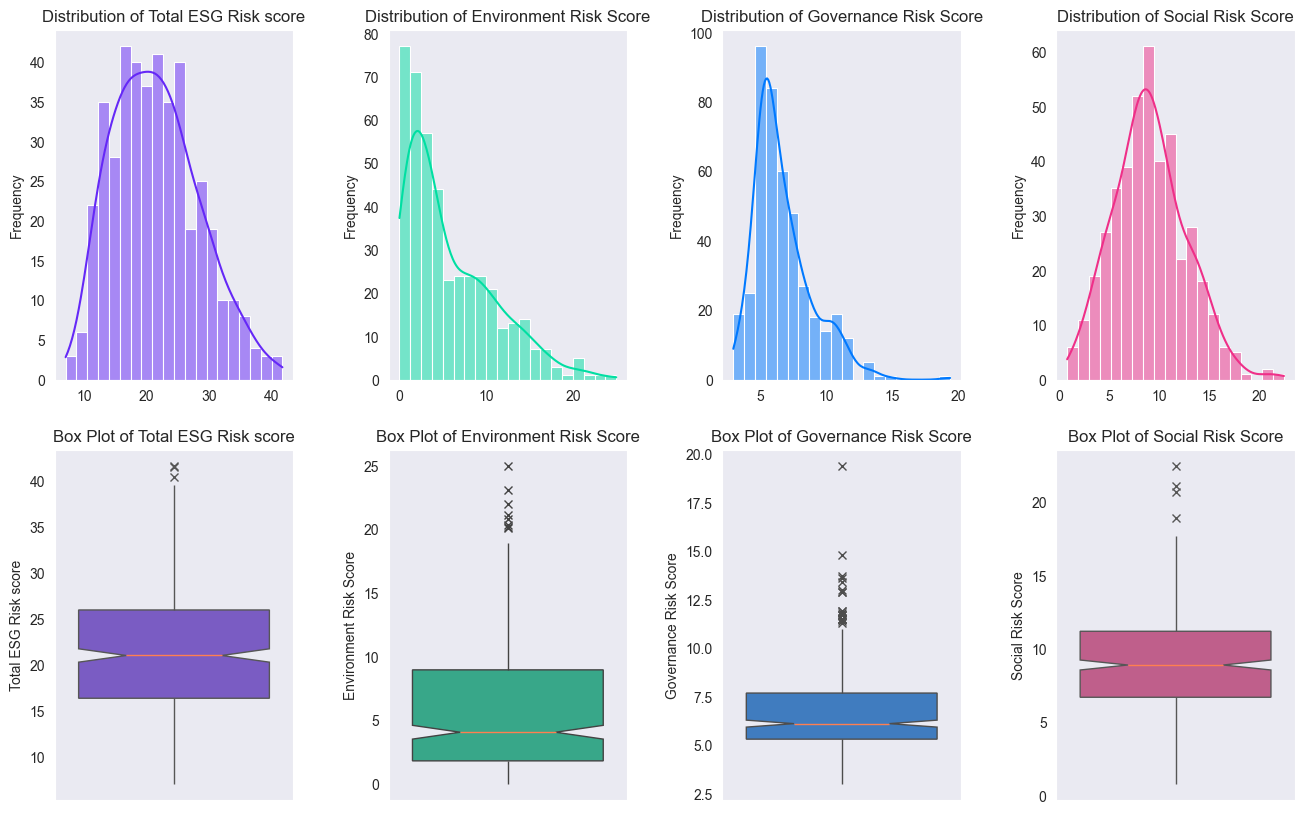

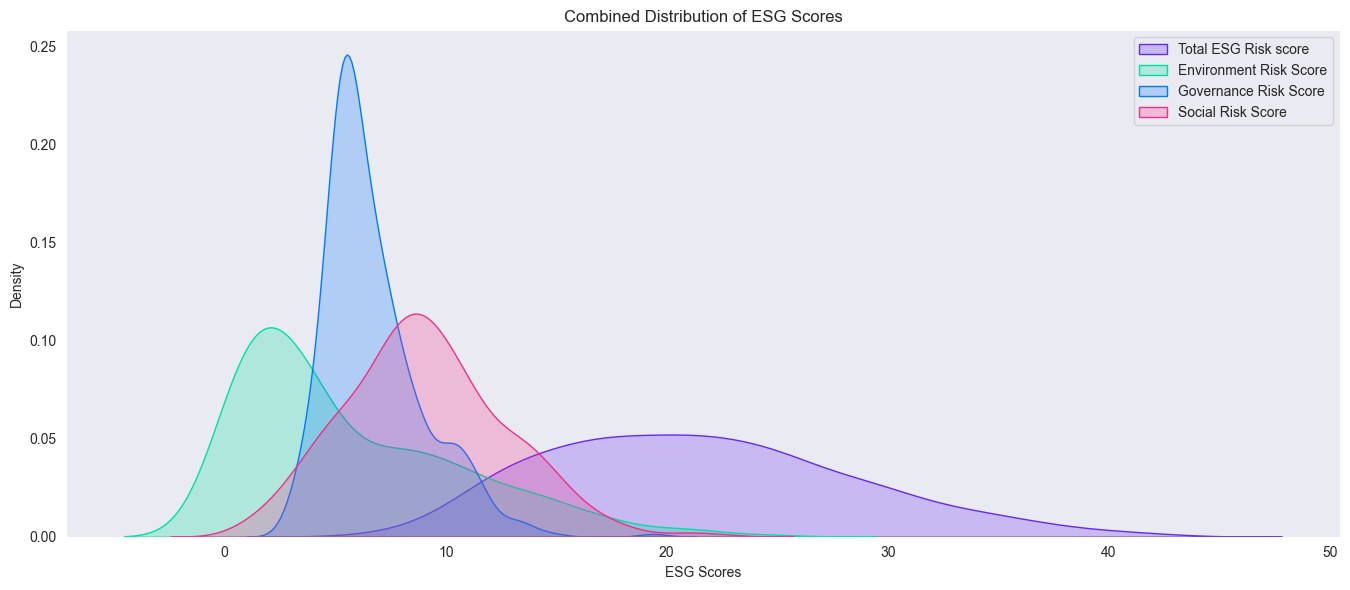

Summary Statistics for ESG Scores:
+-------+----------------------+------------------------+-----------------------+--------------------+
|       | Total ESG Risk score | Environment Risk Score | Governance Risk Score | Social Risk Score  |
+-------+----------------------+------------------------+-----------------------+--------------------+
| count |        430.0         |         430.0          |         430.0         |       430.0        |
| mean  |  21.53372093023256   |   5.739767441860465    |   6.725116279069767   |  9.07046511627907  |
|  std  |  6.889176174272724   |   5.092420890749431    |   2.208084712671996   | 3.6579239615621457 |
|  min  |         7.1          |          0.0           |          3.0          |        0.8         |
|  25%  |         16.4         |          1.8           |          5.3          |        6.7         |
|  50%  |        21.05         |          4.05          |          6.1          |        8.9         |
|  75%  |         26.0         |      

In [61]:
from tabulate import tabulate 

esg_scores = df[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]

# Set style
sns.set_style("dark")

# Define a custom color palette
colors = ["#6528F7", "#00DFA2", "#0079FF", "#EF2F88"]


# Create subplots for histograms and distribution plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.4)

# Iterate through each ESG score column
for i, col in enumerate(esg_scores.columns):
    # Plot histogram
    sns.histplot(
        esg_scores[col], 
        bins=20, 
        kde=True, 
        ax=axes[0, i], 
        color=colors[i]
    )
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].set_title(f'Distribution of {col}')


    # Plot box plot with the same color
    sns.boxplot(
        y=esg_scores[col], 
        ax=axes[1, i], 
        color=colors[i],
        saturation=0.5,
        notch=True, 
        showcaps=False,
        flierprops={"marker": "x"},
        medianprops={"color":"coral"}
    )
    axes[1, i].set_ylabel(col)
    axes[1, i].set_xlabel('')
    axes[1, i].set_title(f'Box Plot of {col}')


#  Create a single KDE plot for all ESG scores
plt.figure(figsize=(13.6, 6))

# Iterate through each ESG score column and plot its KDE
for i, col in enumerate(esg_scores.columns):
    sns.kdeplot(
        esg_scores[col],
        color=colors[i], 
        label=col, 
        fill=True
    )
    
# Add labels and a title
plt.xlabel('ESG Scores')
plt.ylabel('Density')
plt.title('Combined Distribution of ESG Scores')

# Add a legend
plt.legend()

plt.tight_layout()
plt.show()


# Identify and display outliers
outliers = {}

for col in esg_scores.columns:
    Q1 = esg_scores[col].quantile(0.25)
    Q3 = esg_scores[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = esg_scores[(esg_scores[col] < lower_bound) | (esg_scores[col] > upper_bound)]
    outliers[col] = col_outliers

# Display summary statistics as a nice table
summary_stats = esg_scores.describe()
print("Summary Statistics for ESG Scores:")
print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

# Display outliers as nice tables
for col, outlier_df in outliers.items():
    print(f"Outliers in {col}:")
    print(tabulate(outlier_df, headers='keys', tablefmt='pretty'))


In [62]:
# Create a copy of the original dataset
data_no_outliers = df.copy()

# Identify and remove outliers
for col in esg_scores.columns:
    Q1 = esg_scores[col].quantile(0.25)
    Q3 = esg_scores[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the copy of the dataset
    data_no_outliers = data_no_outliers[(data_no_outliers[col] >= lower_bound) & (data_no_outliers[col] <= upper_bound)]

# Reset the index of the new DataFrame
data_no_outliers.reset_index(drop=True, inplace=True)

# Display the shape of the new dataset without outliers
print(f"Shape of the dataset without outliers: {data_no_outliers.shape}")

Shape of the dataset without outliers: (397, 15)


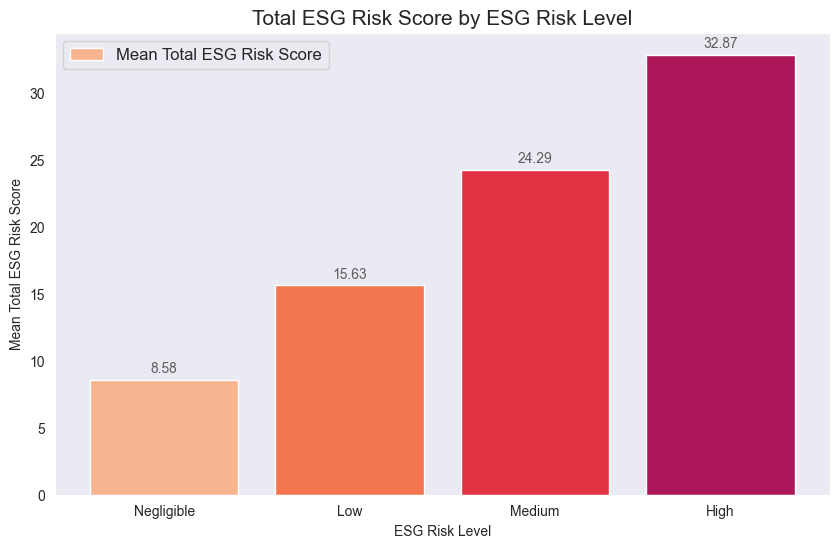

In [63]:
# Group by 'ESG Risk Level' and calculate the mean 'Total ESG Risk Score' for each level
grouped_data = data_no_outliers.groupby('ESG Risk Level')['Total ESG Risk score'].mean().reset_index()

# Define the ESG risk levels
risk_levels = ['Negligible', 'Low', 'Medium', 'High']

sns.set_style("dark")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Sort the grouped data by ESG Risk Level in the desired order
grouped_data = grouped_data.loc[grouped_data['ESG Risk Level'].isin(risk_levels)]
grouped_data = grouped_data.set_index('ESG Risk Level').loc[risk_levels].reset_index()

# Use a Seaborn color palette
palette = sns.color_palette("rocket_r")  # Convert to a list of colors

# Create a bar chart for 'Total ESG Risk Score' for each risk level with the Seaborn palette
bars = ax.bar(grouped_data['ESG Risk Level'], grouped_data['Total ESG Risk score'], color=palette)

# Add labels and title
plt.xlabel('ESG Risk Level')
plt.ylabel('Mean Total ESG Risk Score')
plt.title('Total ESG Risk Score by ESG Risk Level', fontsize=15)

# Add a legend for color reference
ax.legend([f'Mean Total ESG Risk Score'], fontsize=12, loc='upper left')

# Add data labels above the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10,
                color='black', alpha=0.6)

# Show the plot
plt.show()

*Sector*

In [65]:
# Count the number of Unique Sectors
sectors_count = df['Sector'].nunique()

print("Number of Unique Sectors:", sectors_count)

# Count the number of Unique Industries
industries_count = df['Industry'].nunique()

print("Number of Unique Industries:", industries_count)

Number of Unique Sectors: 11
Number of Unique Industries: 116


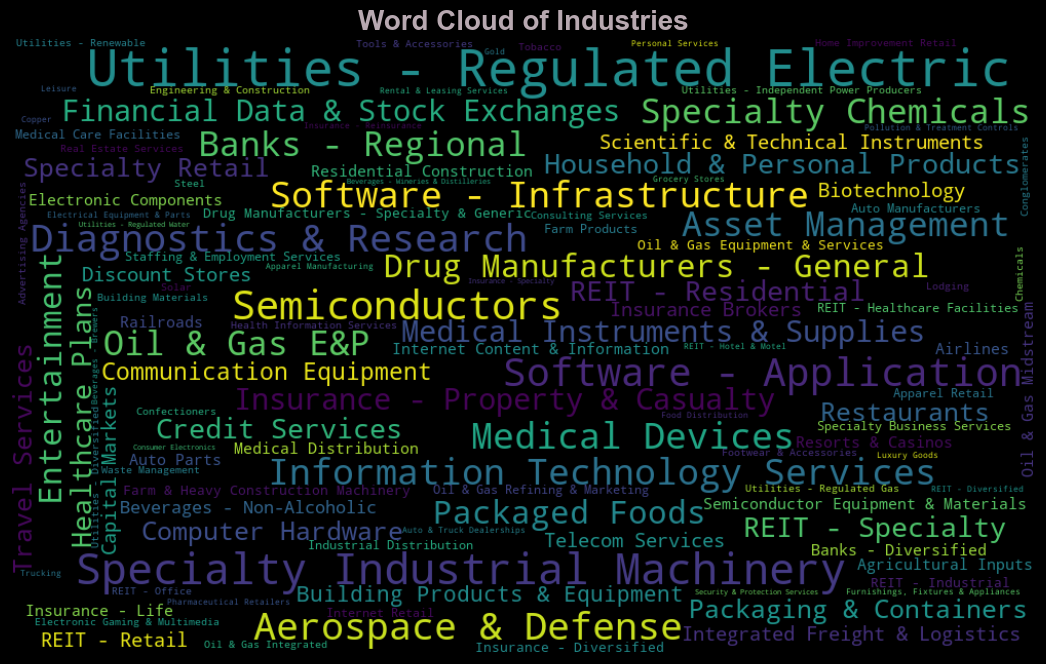

In [72]:
# Get the unique industries and their frequency counts
industry_counts = df['Industry'].value_counts()

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='black', colormap='viridis').generate_from_frequencies(industry_counts)

# Display the word cloud
plt.figure(figsize=(16, 8), facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Industries", color="#b8a9b1", fontsize=20, fontweight="bold")
plt.show()

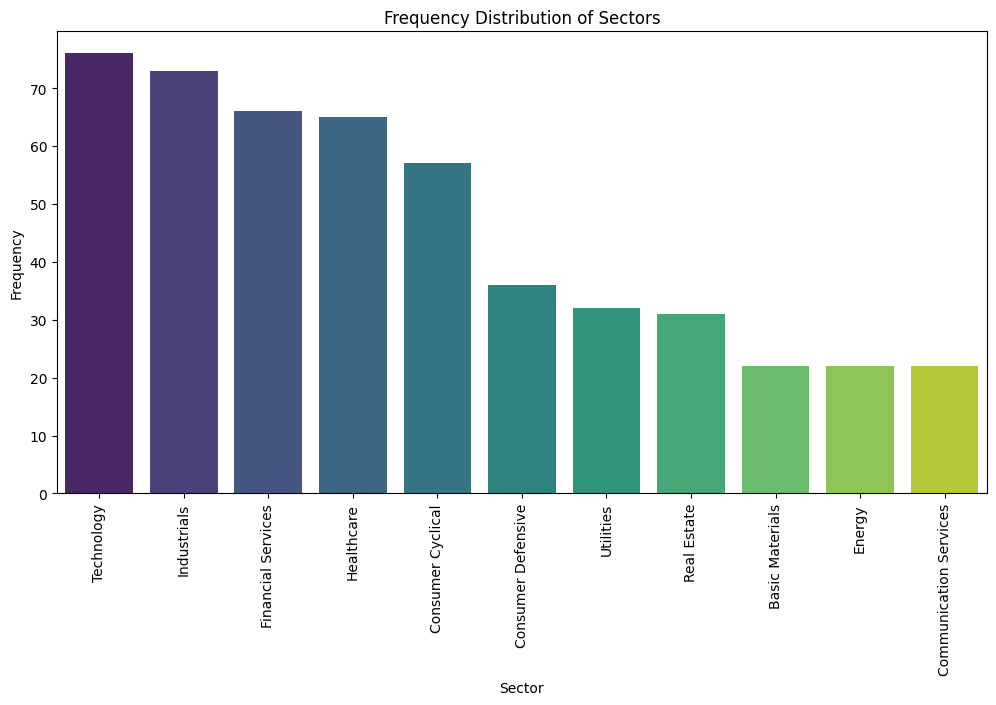

In [ ]:
# Frequency count for Sector
sector_counts = df['Sector'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_counts.index, y=sector_counts.values, hue=sector_counts.index, palette='viridis', legend=False)
plt.title('Frequency Distribution of Sectors')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show();


*ESG Risk Level*

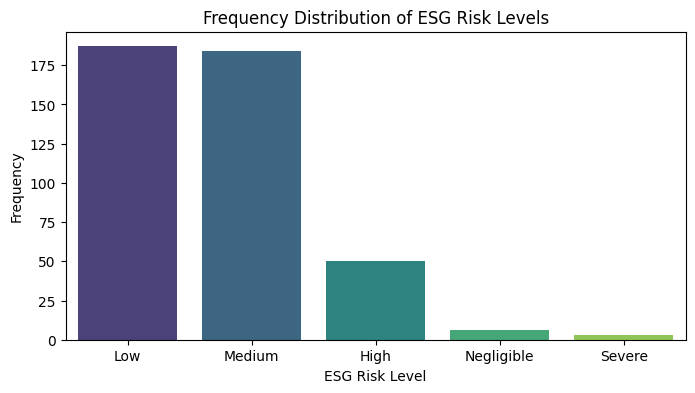

In [ ]:
# Frequency count for ESG Risk Level
esg_risk_level_counts = df['ESG Risk Level'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=esg_risk_level_counts.index, y=esg_risk_level_counts.values, hue=esg_risk_level_counts.index, palette='viridis', legend=False)
plt.title('Frequency Distribution of ESG Risk Levels')
plt.xlabel('ESG Risk Level')
plt.ylabel('Frequency')
plt.show();

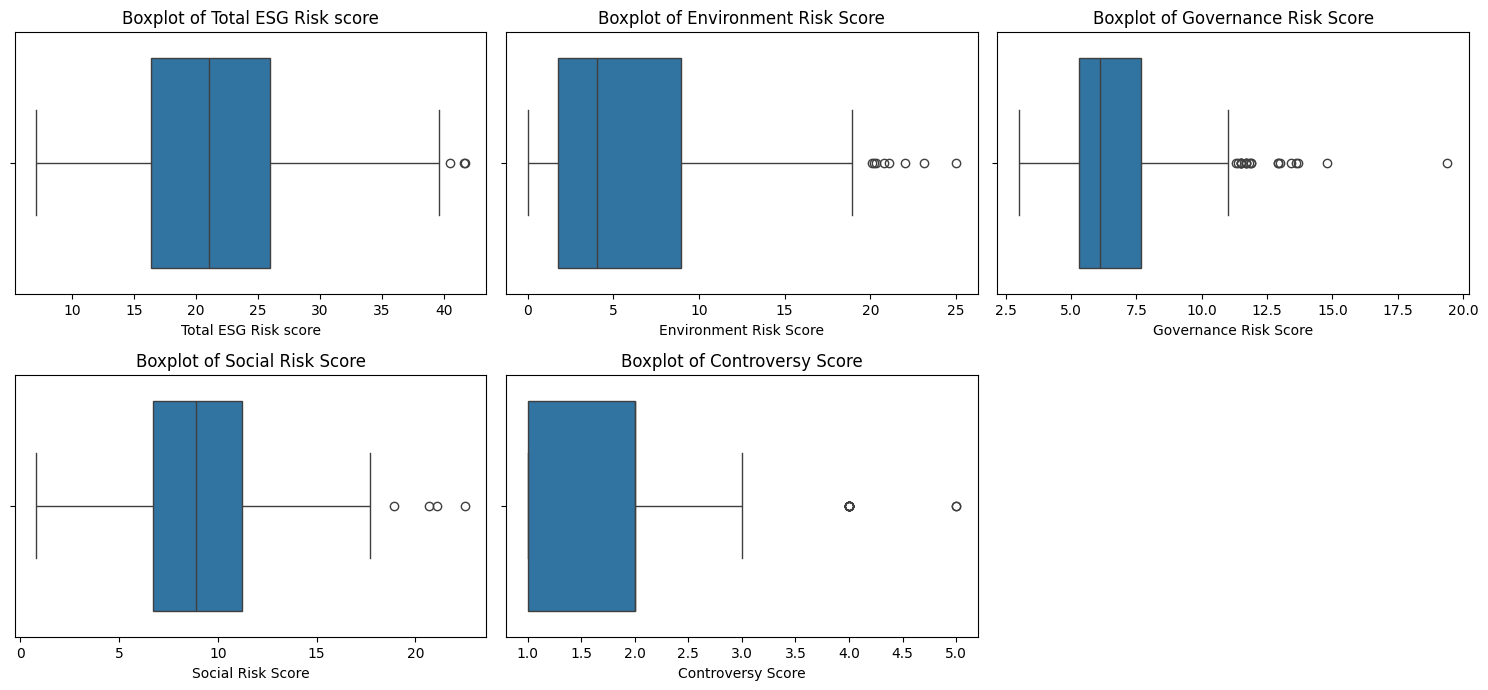

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
num_cols = len(numerical_columns)
num_subplots = min(num_cols, 9)  # Maximum 9 subplots

for i, column in enumerate(numerical_columns[:num_subplots], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show();

**HANDLING MISSING VALUES**

To do this, we use the KNN imputation technique

In [ ]:
# Check for null values
null_values = df.isna().sum()
columns_with_null = null_values[null_values > 0]

# Display columns with null values
print("Columns with null values:")
print(columns_with_null)

Columns with null values:
Address                     1
Sector                      1
Industry                    1
Full Time Employees         5
Description                 1
Total ESG Risk score       73
Environment Risk Score     73
Governance Risk Score      73
Social Risk Score          73
Controversy Level          73
Controversy Score         100
ESG Risk Percentile        73
ESG Risk Level             73
dtype: int64


In [ ]:
# Impute missing values
for column, count in columns_with_null.items():
    if df[column].dtype == 'object':  # Handling categorical columns
        # Fill with mode (most frequent value)
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
    else:  # Handling numerical columns
        # Fill with mean
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

# Verify null values after imputation
print("\nNull values after imputation:")
print(df.isna().sum())


Null values after imputation:
Symbol                    0
Name                      0
Address                   0
Sector                    0
Industry                  0
Full Time Employees       0
Description               0
Total ESG Risk score      0
Environment Risk Score    0
Governance Risk Score     0
Social Risk Score         0
Controversy Level         0
Controversy Score         0
ESG Risk Percentile       0
ESG Risk Level            0
dtype: int64


In [ ]:
# using the zscore

def handle_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    
    # Replace outliers with the median
    data.loc[outliers, column] = data[column].median()
    return data


numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for column in numerical_columns:
    df = handle_outliers_zscore(df, column)

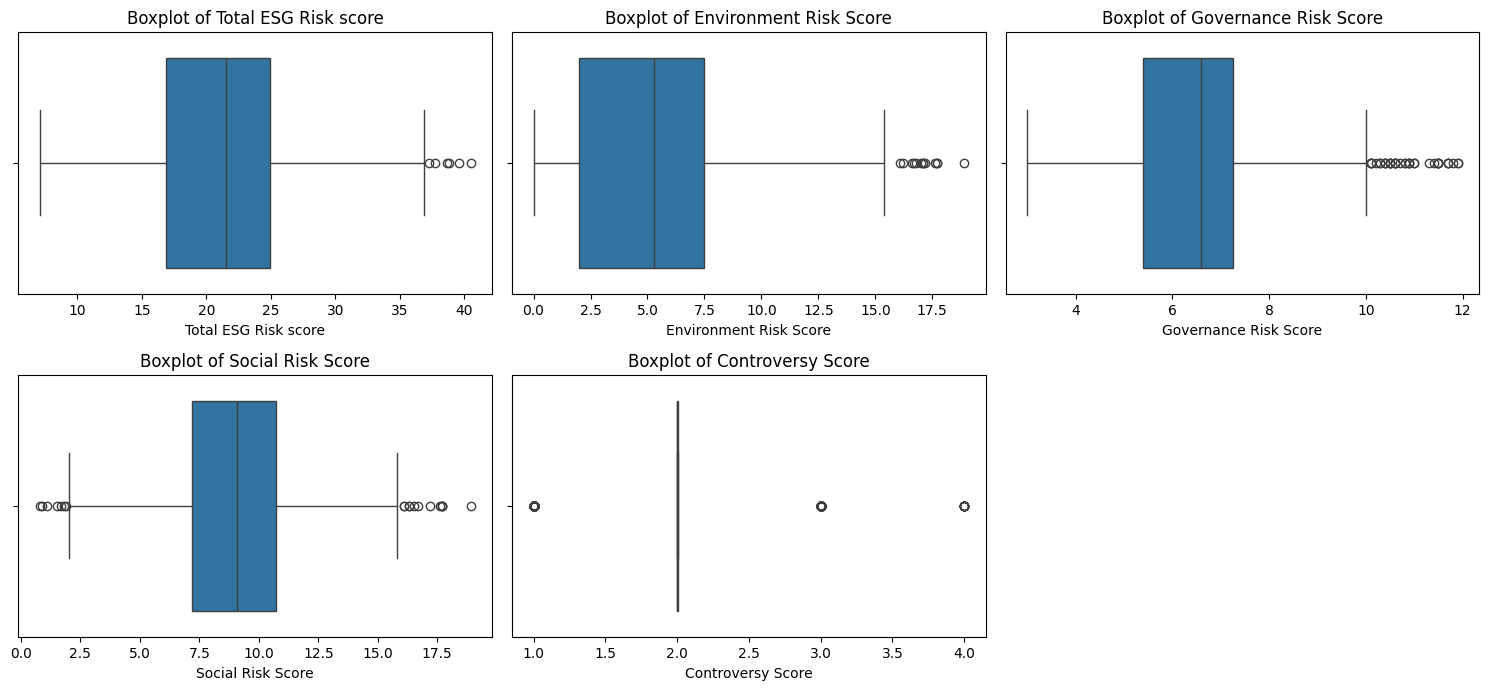

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns[:num_subplots], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show();